In [24]:
from keras.applications import VGG16
from keras import models, layers, optimizers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
conv_base = VGG16(weights='imagenet', include_top=False,
                  input_shape=(150, 150, 3))

In [27]:
train_dir = '/content/drive/MyDrive/cats_and_dogs_small/train'
validation_dir = '/content/drive/MyDrive/cats_and_dogs_small/validation'
test_dir = "/content/drive/MyDrive/cats_and_dogs_small/test"

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150),
                                                      batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                        batch_size=20, class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Construct Classifier

In [28]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Freeze convolutional base

In [29]:
conv_base.trainable = False

In [30]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='binary_crossentropy',
              metrics = ['acc'])
history = model.fit(train_generator, steps_per_epoch=100,
                    epochs=30,
                    validation_data=(validation_generator), validation_steps=50)

Epoch 1/30
100/100 [==============================] - 40s 389ms/step - loss: 0.5941 - acc: 0.7015 - val_loss: 0.4571 - val_acc: 0.8210
Epoch 2/30
100/100 [==============================] - 37s 367ms/step - loss: 0.4916 - acc: 0.7800 - val_loss: 0.3805 - val_acc: 0.8470
Epoch 3/30
100/100 [==============================] - 30s 302ms/step - loss: 0.4383 - acc: 0.8105 - val_loss: 0.3404 - val_acc: 0.8580
Epoch 4/30
100/100 [==============================] - 30s 300ms/step - loss: 0.4038 - acc: 0.8210 - val_loss: 0.3303 - val_acc: 0.8480
Epoch 5/30
100/100 [==============================] - 29s 294ms/step - loss: 0.3855 - acc: 0.8420 - val_loss: 0.2975 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 30s 297ms/step - loss: 0.3767 - acc: 0.8295 - val_loss: 0.2970 - val_acc: 0.8730
Epoch 7/30
100/100 [==============================] - 30s 298ms/step - loss: 0.3687 - acc: 0.8365 - val_loss: 0.2935 - val_acc: 0.8670
Epoch 8/30
100/100 [==============================] - 3

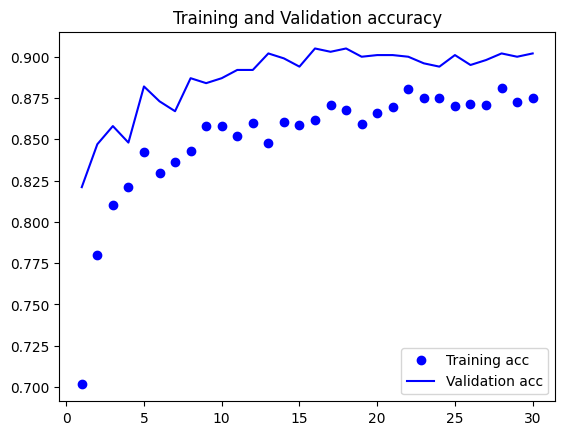

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

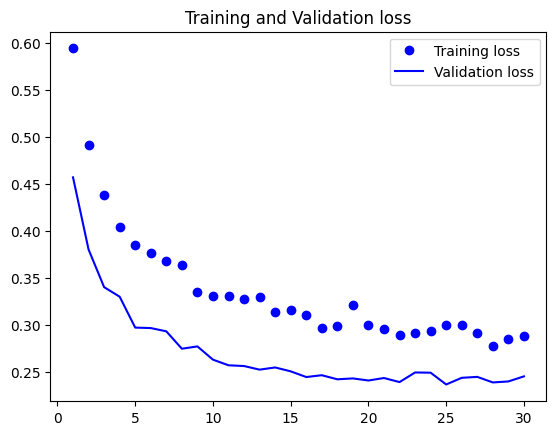

In [32]:
plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()